In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style='white')
from matplotlib import pyplot as plt

### Singapore Population Prediction and Enhancement

In [3]:
SgData = pd.read_csv('SgData.csv')
SgData

,Year,TR,TMR,TFR,SR,MAR
0,2022,4073239,1990212,2083027,955,42.1
1,2021,3986842,1953114,2033728,960,41.8
2,2020,4044210,1977556,2066654,957,41.5
3,2019,4026209,1969382,2056827,957,41.1
4,2018,3994283,1955838,2038445,959,40.8
...,...,...,...,...,...,...
61,1961,1702400,886500,815900,1087,17.9
62,1960,1646400,859600,786800,1093,18.0
63,1959,1587200,830800,756400,1098,18.3
64,1958,1518800,797600,721200,1106,18.5


TR = Total Residents
<br>
TMR = Total Male Residents
<br>
TFR = Total Female Residents
<br>
SR = Sex Ratio
<br>
MAR = Median Age of Residents
<br>

a. Year-Population Plot

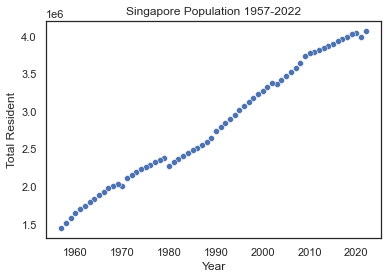

In [4]:
sns.scatterplot(x=SgData['Year'], y=SgData['TR'])
plt.title('Singapore Population 1957-2022')
plt.ylabel('Total Resident')
plt.xlabel('Year')
plt.show()

b. Model Fitting

In [5]:
sg_train = SgData.loc[SgData['Year']<=2013, :]
sg_test = SgData.loc[SgData['Year']>2013, :]

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
x1 = sg_train['Year']
y1 = sg_train['TR']
x2 = sg_test['Year']
y2 = sg_test['TR']

x1 = np.array(x1).reshape(-1, 1)
x2 = np.array(x2).reshape(-1, 1)
y1 = np.array(y1).reshape(-1, 1)
y2 = np.array(y2).reshape(-1, 1)

In [8]:
rgs = LinearRegression()
rgs.fit(x1, y1)
y1_pred = rgs.predict(x1)

c. i. Best-Fit Line

In [9]:
print('Slope: ', rgs.coef_)
print('y-Intercept: ', rgs.intercept_)

Slope:  [[40975.96590614]]
y-Intercept:  [-78707770.39387262]


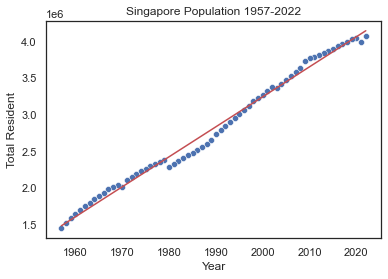

In [10]:
sns.scatterplot(x=SgData['Year'], y=SgData['TR'])
temp = SgData['Year'].map(lambda x: rgs.coef_*x+rgs.intercept_)
plt.plot(SgData['Year'], temp, color='r')
plt.title('Singapore Population 1957-2022')
plt.ylabel('Total Resident')
plt.xlabel('Year')
plt.show()

c. ii. R^2 Coefficient

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
r2 = r2_score(y1, y1_pred)
print('R2: ', r2)

R2:  0.9857883020995728


c. iii. Training MSE

In [13]:
mse = mean_squared_error(y1, y1_pred)
print('Train MSE: ', mse)

Train MSE:  6551722294.557682


c. iv. Testing

In [14]:
y2_pred = rgs.predict(x2)
print(np.column_stack((x2, y2_pred)))

[[2.02200000e+03 4.14563267e+06]
 [2.02100000e+03 4.10465670e+06]
 [2.02000000e+03 4.06368074e+06]
 [2.01900000e+03 4.02270477e+06]
 [2.01800000e+03 3.98172880e+06]
 [2.01700000e+03 3.94075284e+06]
 [2.01600000e+03 3.89977687e+06]
 [2.01500000e+03 3.85880091e+06]
 [2.01400000e+03 3.81782494e+06]]


c. v. Testing MSE

In [15]:
mse = mean_squared_error(y2, y2_pred)
print('Testing MSE: ', mse)

Testing MSE:  2907187388.7105937


d. Prediction

In [16]:
X = []
for i in range(2030, 2051):
    X.append(i)
X = np.array(X).reshape(-1, 1)

In [17]:
Y = rgs.predict(X)
rs = np.column_stack((X, Y))
rs = pd.DataFrame(rs)
rs.columns = ['Year', 'Population']
rs

,Year,Population
0,2030.0,4.473440e+06
1,2031.0,4.514416e+06
2,2032.0,4.555392e+06
3,2033.0,4.596368e+06
4,2034.0,4.637344e+06
5,2035.0,4.678320e+06
6,2036.0,4.719296e+06
7,2037.0,4.760272e+06
8,2038.0,4.801248e+06
9,2039.0,4.842224e+06


This result is partly reasonable. It is because, in natural population growth principles, there should be competition between samples and the growth rate might naturally decrease to 0. However, in the linear regression model, the growth rate is a constant value. Perhaps it fits the situation in a short term, but it might not precisely reflect the population growth tendency in long term (e.g., >100 years).
<br>

e. In the middle of the logistic pattern.
<br>


f. Enhancement
<br>
In this case, we apply a multivariate linear regression. We selected some attributes from the Singapore official statistics data to increase the dimensions of the feature set. Before the formal multivariate linear regression, we conducted a correlation analysis to select the most influencing ones from these additional attributes.
<br>
To prevent the imbalanced influences of data from different ranges, a normalization phase should be implemented.

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
sc = MinMaxScaler()
sc = sc.fit(SgData)
tmp = sc.transform(SgData)
tmp = pd.DataFrame(tmp)
tmp.columns = SgData.columns
tmp

,Year,TR,TMR,TFR,SR,MAR
0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
1,0.984615,0.967116,0.969776,0.964783,0.030864,0.987705
2,0.969231,0.988951,0.989689,0.988304,0.012346,0.975410
3,0.953846,0.982100,0.983030,0.981284,0.012346,0.959016
4,0.938462,0.969948,0.971996,0.968152,0.024691,0.946721
...,...,...,...,...,...,...
61,0.061538,0.097617,0.100810,0.094817,0.814815,0.008197
62,0.046154,0.076303,0.078895,0.074030,0.851852,0.012295
63,0.030769,0.053770,0.055432,0.052313,0.882716,0.024590
64,0.015385,0.027736,0.028384,0.027168,0.932099,0.032787


   level_0 level_1  correlation
0     Year    Year     1.000000
1     Year      TR     0.995049
2     Year     TMR     0.995224
3     Year     TFR     0.994672
4     Year      SR    -0.986310
5     Year     MAR     0.993768
6       TR    Year     0.995049
7       TR      TR     1.000000
8       TR     TMR     0.999865
9       TR     TFR     0.999895
10      TR      SR    -0.985545
11      TR     MAR     0.986491
12     TMR    Year     0.995224
13     TMR      TR     0.999865
14     TMR     TMR     1.000000
15     TMR     TFR     0.999521
16     TMR      SR    -0.985694
17     TMR     MAR     0.986876
18     TFR    Year     0.994672
19     TFR      TR     0.999895
20     TFR     TMR     0.999521
21     TFR     TFR     1.000000
22     TFR      SR    -0.985193
23     TFR     MAR     0.985931
24      SR    Year    -0.986310
25      SR      TR    -0.985545
26      SR     TMR    -0.985694
27      SR     TFR    -0.985193
28      SR      SR     1.000000
29      SR     MAR    -0.963656
30     M

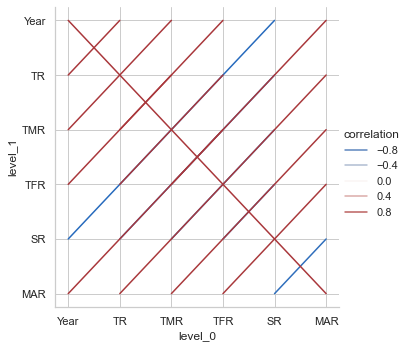

In [20]:
corr_mat = tmp.corr().stack().reset_index(name='correlation')
print(corr_mat)
sns.set_theme(style='whitegrid')
sns.relplot(data=corr_mat,
            x='level_0',
            y='level_1',
            palette="vlag", 
            hue_norm=(-1, 1),
            hue='correlation',
            kind='line'
            )

TR = Total Residents
<br>
TMR = Total Male Residents
<br>
TFR = Total Female Residents
<br>
SR = Sex Ratio
<br>
MAR = Median Age of Residents
<br>

From the correlation plot above, we can conclude that TMR and SR have the greatest positive influence on TR because the correlation coefficients between these attributes and TR are equal to 1. Therefore, we can add these two attributes to our X matrix to improve the accuracy of the prediction.

In [21]:
df = SgData[['Year', 'TR', 'TMR', 'SR']]
df

,Year,TR,TMR,SR
0,2022,4073239,1990212,955
1,2021,3986842,1953114,960
2,2020,4044210,1977556,957
3,2019,4026209,1969382,957
4,2018,3994283,1955838,959
...,...,...,...,...
61,1961,1702400,886500,1087
62,1960,1646400,859600,1093
63,1959,1587200,830800,1098
64,1958,1518800,797600,1106


In [22]:
sc = MinMaxScaler()
sc = sc.fit(df)
train = df.loc[df['Year']<=2013, :]
test = df.loc[df['Year']>2013, :]
tmp_1 = sc.transform(train)
tmp_2 = sc.transform(test)
tmp_1 = pd.DataFrame(tmp_1)
tmp_2 = pd.DataFrame(tmp_2)
tmp_1.columns = df.columns
tmp_2.columns = df.columns

In [23]:
# training
X = tmp_1[['Year', 'TMR', 'SR']]
Y = tmp_1['TR']

rgs = LinearRegression()
rgs.fit(X, Y)
Y_pred = rgs.predict(X)

In [24]:
rs = np.column_stack((np.array(X['Year']),
                      np.array(Y_pred),
                      np.array(X[['TMR', 'SR']])))
rs = sc.inverse_transform(rs)
rs = pd.DataFrame(rs)
rs.columns = df.columns
rs

,Year,TR,TMR,SR
0,2013.0,3.824059e+06,1891504.0,968.0
1,2012.0,3.800450e+06,1880046.0,970.0
2,2011.0,3.775927e+06,1868170.0,972.0
3,2010.0,3.761988e+06,1861133.0,974.0
4,2009.0,3.727567e+06,1844732.0,976.0
5,2008.0,3.637403e+06,1802992.0,980.0
6,2007.0,3.578670e+06,1775477.0,982.0
7,2006.0,3.520707e+06,1748242.0,983.0
8,2005.0,3.462875e+06,1721139.0,985.0
9,2004.0,3.407377e+06,1695031.0,986.0


In [25]:
r2 = r2_score(rs['Year'], train['Year'])
mse = mean_squared_error(rs['Year'], train['Year'])
print('Training MSE: ', mse)
print('Training R2: ', r2)

Training MSE:  0.0
Training R2:  1.0


In [26]:
# testing
X = tmp_2[['Year', 'TMR', 'SR']]
Y = tmp_2['TR']

In [27]:
rgs = LinearRegression()
rgs.fit(X, Y)
Y_pred = rgs.predict(X)

In [28]:
rs = np.column_stack((np.array(X['Year']),
                      np.array(Y_pred),
                      np.array(X[['TMR', 'SR']])))
rs = sc.inverse_transform(rs)
rs = pd.DataFrame(rs)
rs.columns = df.columns
rs

,Year,TR,TMR,SR
0,2022.0,4.073281e+06,1990212.0,955.0
1,2021.0,3.986846e+06,1953114.0,960.0
2,2020.0,4.044114e+06,1977556.0,957.0
3,2019.0,4.025991e+06,1969382.0,957.0
4,2018.0,3.994519e+06,1955838.0,959.0
5,2017.0,3.965867e+06,1943545.0,961.0
6,2016.0,3.933324e+06,1929526.0,963.0
7,2015.0,3.903308e+06,1916628.0,965.0
8,2014.0,3.870317e+06,1902410.0,967.0


In [29]:
r2 = r2_score(rs['Year'], test['Year'])
mse = mean_squared_error(rs['Year'], test['Year'])
print('Testing MSE: ', mse)
print('Testing R2: ', r2)

Testing MSE:  5.744309809396025e-27
Testing R2:  1.0


The testing result of multivariate regression has a 0-like MSE and its R^2 coefficient equals to 1, which is much more precise than the previous simple linear regression with [Testing MSE, R^2] = [2907187388.7105937, 0.9857883020995728].
<br>
Therefore, multivariate linear regression can be considered an effective enhancement method.

### Chinese Population Prediction
a. Load Dataset

In [30]:
CNData = pd.read_csv('CNData.csv')
CNData

,Year,PPL
0,1960,667070000
1,1961,660330000
2,1962,665770000
3,1963,682335000
4,1964,698355000
...,...,...
57,2017,1396215000
58,2018,1402760000
59,2019,1407745000
60,2020,1411100000


PPL = Population

b. Year-Population Plot

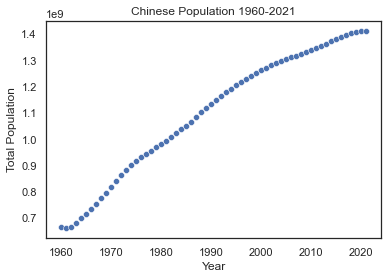

In [31]:
sns.set_theme(style='white')
sns.scatterplot(x=CNData['Year'], y=CNData['PPL'])
plt.title('Chinese Population 1960-2021')
plt.ylabel('Total Population')
plt.xlabel('Year')
plt.show()

c. Model Training

In [32]:
cn_train = CNData.loc[CNData['Year']<=2013, :]
cn_test = CNData.loc[CNData['Year']>2013, :]

In [33]:
x1 = np.array(cn_train['Year']).reshape(-1, 1)
x2 = np.array(cn_test['Year']).reshape(-1, 1)
y1 = np.array(cn_train['PPL']).reshape(-1, 1)
y2 = np.array(cn_test['PPL']).reshape(-1, 1)

In [34]:
rgs = LinearRegression()
rgs.fit(x1, y1)
y1_pred = rgs.predict(x1)

d. i. Best-Fit Line

In [35]:
print('Slope: ', rgs.coef_)
print('y-Intercept: ', rgs.intercept_)

Slope:  [[14006789.21288355]]
y-Intercept:  [-2.67690896e+10]


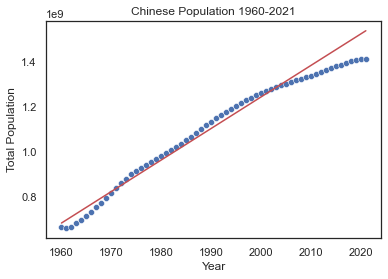

In [36]:
temp = CNData['Year'].map(lambda x: rgs.coef_*x+rgs.intercept_)
sns.scatterplot(x=CNData['Year'], y=CNData['PPL'])
plt.plot(CNData['Year'], temp, color='r')
plt.title('Chinese Population 1960-2021')
plt.ylabel('Total Population')
plt.xlabel('Year')
plt.show()

d. ii. R^2 Coefficient

In [37]:
r2 = r2_score(y1, y1_pred)
print('R2: ', r2)

R2:  0.9832476129933141


d. iii. Training MSE

In [38]:
mse = mean_squared_error(y1, y1_pred)
print('Training MSE: ', mse)

Training MSE:  811985540736408.5


d. iv. Testing

In [39]:
y2_pred = rgs.predict(x2)

d. v. Testing MSE

In [40]:
mse = mean_squared_error(y2, y2_pred)
print('Testing MSE: ', mse)

Testing MSE:  9065457889543732.0


e. Prediction of 2030-2050

In [41]:
X = []
for i in range(2030, 2051):
    X.append(i)
X = np.array(X).reshape(-1, 1)

In [42]:
Y = rgs.predict(X)
rs = np.column_stack((X, Y))
rs = pd.DataFrame(rs)
rs.columns = ['Year', 'Population']
rs

,Year,Population
0,2030.0,1.664692e+09
1,2031.0,1.678699e+09
2,2032.0,1.692706e+09
3,2033.0,1.706713e+09
4,2034.0,1.720720e+09
5,2035.0,1.734726e+09
6,2036.0,1.748733e+09
7,2037.0,1.762740e+09
8,2038.0,1.776747e+09
9,2039.0,1.790754e+09


This prediction is not reasonable. From the figure plotted in the previous stage, it can be easily found that the growth rate of the Chinese population is descending. The predicted growth rate (slope) is a large constant because the dataset used includes the phases of acceleration of Chinese population growth. It does not match the current situation in China.

f. Logistic pattern.

g. As mentioned earlier, multivariate linear regression can be used to improve the precision of the prediction. However, due to the lack of further information, we did not verify this enhancement method by predicting the Chinese population.